## Описание задачи

В таблице представлены средние значения количества слов $y$, которыми владеет ребенок в заданном возрасте $t$.
```
  t        y
---------------  
 1.0        3
 1.5       22
 2.0      272
 2.5      446
 3.0      896
 3.5     1222
 4.0     1540
 4.5     1870
 5.0     2072
 6.0     2562
```

Построить линейную $y = \beta_0 + \beta_1 x$ и две логистические модели: 
$$
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 t}},
\qquad
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 (t - t_0)}},
$$
аппроксимирующие данные.    
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

### Импортируем необходимые модули

In [1]:
import numpy as np # Библиотека для работы с массивами 
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
# Магический метод, позволяющий выводить графики в браузере
from scipy import linalg # Модуль операций линейной алгебры

Внесем исходные данные задачи в массимы модуля `numpy`

In [2]:
t = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6])
y = np.array([3, 22, 272, 446, 896, 1222, 1540, 1870, 2072, 2562])

Отобразим исходные точки на графике

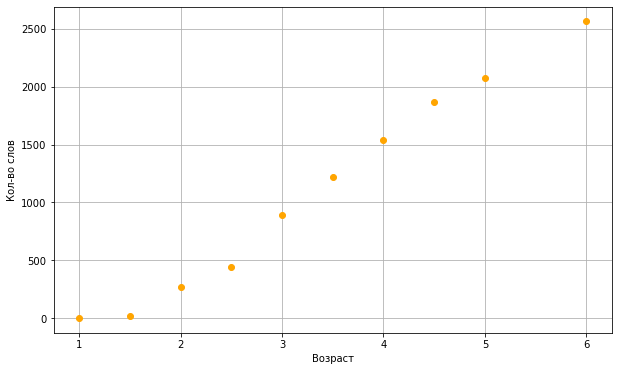

In [3]:
plt.figure(figsize=(10, 6)) # задаем размер графика
plt.plot(t, y, 'o', color='orange'); # Символ ";" позволяет построить только график без вывода дополнительной информации
plt.grid() # выводим сетку
plt.xlabel("Возраст"); # подпись оси X
plt.ylabel("Кол-во слов"); # подпись оси Y

## Построение линейной модели аппроксимации

Для нахождения коэффициентов линейной регрессии $\beta_0$ и $\beta_1$ нужно решить уравнение в матричном виде
$$
(X^{\rm T} X)\, \beta = X^{\rm T} t,
$$
где $X$, $t$ и $\beta$ - матрицы вида: $$
X = 
\left(
\begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m \\
\end{array}
\right),
\qquad
t =
\left(
\begin{array}{c}
t_1 \\
t_2 \\
\vdots \\
t_m \\
\end{array}
\right),
\qquad
\beta =
\left(
\begin{array}{c}
\beta_0 \\
\beta_1 \\
\end{array}
\right),
$$

In [4]:
X = np.stack((np.ones(len(t)), t)).T # из двух строк транспонируем матрицу, приводя к нужному виду
beta = np.linalg.solve(X.T@X, X.T@y) # знак "@" - векторное умножение матриц 
print(f'Бета 0 = {beta[0]}')
print(f'Бета 1 = {beta[1]}')

Бета 0 = -763.8571428571429
Бета 1 = 561.9264069264069


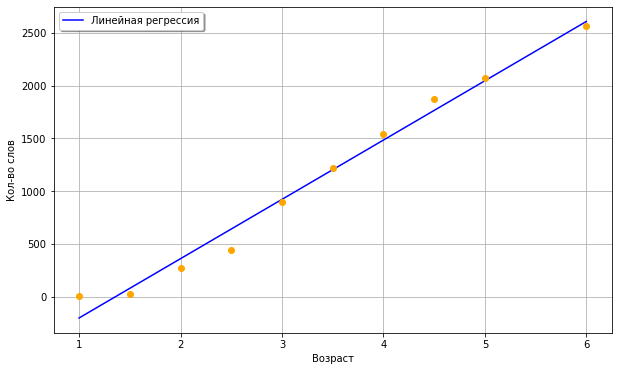

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t, X@beta, color='blue', label='Линейная регрессия'); # график линейной зависимости
plt.plot(t, y, 'o', color='orange'); # исходный набор точек
plt.grid()
plt.xlabel("Возраст");
plt.ylabel("Кол-во слов");
plt.legend(shadow=True);

Задачу линейной регрессии можно решить функцией `lstsq`, которая также может найти сумму квадратов отклонений

In [60]:
beta, residuals, rank, sv = linalg.lstsq(X, y)
print(f'Бета0 и бета1 = {beta}')
print(f'Сумма квадаратов отклонений = {residuals}')

Бета0 и бета1 = [-763.85714286  561.92640693]
Сумма квадаратов отклонений = 109032.77489177503


## Построение логистических функций

Доимпортируем нужный метод

In [7]:
from scipy.optimize import curve_fit

Построить нужно следующие модели:
$$
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 t}},
\qquad
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 (t - t_0)}},
$$

In [8]:
t = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6])
y = np.array([3, 22, 272, 446, 896, 1222, 1540, 1870, 2072, 2562])

In [9]:
def logistic_1(t, beta_0, beta_1, beta_2):
    return beta_0 / (1 + beta_1 * np.exp(-1 * beta_2 * t))

def logistic_2(t, beta_0, beta_1, beta_2, t_0):
    return beta_0 / (1 + beta_1 * np.exp(-beta_2 * t + beta_2*t_0))

In [45]:
args, _ = curve_fit(logistic_1, t, y, method='trf', bounds=(-np.inf, [3000., 200., 3.]))
beta_01, beta_11, beta_21 = args[0], args[1], args[2] 
print(args)
y_fit1 = logistic_1(t, beta_01, beta_11, beta_21)


[2.61269647e+03 9.57686840e+01 1.23640565e+00]


In [57]:
args1, _ = curve_fit(logistic_2, t, y, method='trf', bounds=(-np.inf, [3000., 200., 3., 1])) 
beta_02, beta_12, beta_22, t_02 = args1[0], args1[1], args1[2], args1[3]
print(args1)
y_fit2 = logistic_2(t, beta_02, beta_12, beta_22, t_02)

[ 2.61269599e+03  1.03617402e+02  1.23640648e+00 -6.37069290e-02]


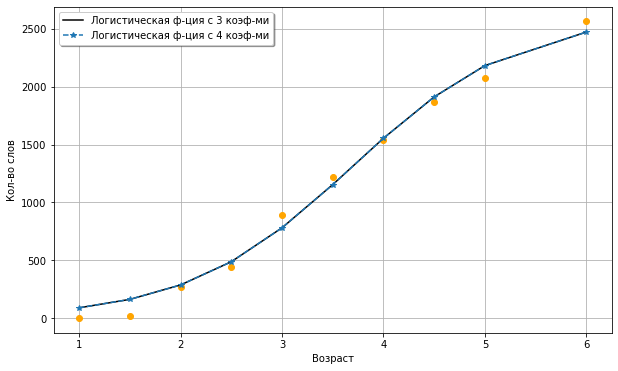

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'o', color='orange')
plt.plot(t, y_fit1, color='black', label='Логистическая ф-ция с 3 коэф-ми')
plt.plot(t, y_fit2, marker='*', label='Логистическая ф-ция с 4 коэф-ми', linestyle='dashed')
plt.xlabel("Возраст");
plt.ylabel("Кол-во слов");
plt.grid()
plt.legend(shadow=True);

Посчитаем сумму квадратов отклонений двух этих функций 

In [59]:
print(f'Для логистической функции с тремя коэффициентами общая ошибка = {sum((y_fit1 - y) ** 2)}')
print(f'Для логистической функции с четырьмя коэффициентами общая ошибка = {sum((y_fit2 - y) ** 2)}')

Для логистической функции с тремя коэффициентами общая ошибка = 69718.30187994588
Для логистической функции с четырьмя коэффициентами общая ошибка = 69718.30188159796


## Выводы

Сравнивая аппрокимацию данных для линейной функцией и логистической сильно лучший результат дает второй вариант, более чем в 1,5 раза точнее результаты. 
В сравнении логистических функций с тремя неизвестными коэффициентами и четырьмя разница почти не наблюдается, только в пятом знаке после запятой